# Neo4j - GraphDatabase Example

## Remove all data (if exists)

In [1]:
from neo4j import GraphDatabase

class Neo4jHandler:
    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self.driver.close()

    def delete_all_data(self):
        with self.driver.session() as session:
            session.execute_write(self._delete_all)

    @staticmethod
    def _delete_all(tx):
        query = "MATCH (n) DETACH DELETE n"
        tx.run(query)

# Main Application Logic
if __name__ == "__main__":
    neo4j_handler = Neo4jHandler(uri="bolt://neo4j:7687", user="neo4j", password="geheim")
    
    # Delete all data from Neo4j
    neo4j_handler.delete_all_data()
    print("All data deleted from Neo4j.")
    
    # Close connection
    neo4j_handler.close()


All data deleted from Neo4j.


# Insert Sample Data

In [2]:
from neo4j import GraphDatabase

# Neo4j Connection Setup
class Neo4jHandler:
    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self.driver.close()

    def create_person(self, name, age):
        with self.driver.session() as session:
            session.execute_write(self._create_person, name, age)

    @staticmethod
    def _create_person(tx, name, age):
        query = (
            "CREATE (p:Person {name: $name, age: $age}) "
            "RETURN p.name, p.age"
        )
        tx.run(query, name=name, age=age)


# Insert sample data into Neo4j
def insert_sample_data(neo4j_handler):
    people = [
        {"name": "Alice", "age": 30},
        {"name": "Bob", "age": 25},
        {"name": "Charlie", "age": 40},
        {"name": "Diana", "age": 35},
        {"name": "Eve", "age": 45},
    ]

    for person in people:
        neo4j_handler.create_person(person["name"], person["age"])

# Main Application Logic
if __name__ == "__main__":
    # Setup connection to Neo4j
    neo4j_handler = Neo4jHandler(uri="bolt://neo4j:7687", user="neo4j", password="geheim")
    
    # Insert sample data
    insert_sample_data(neo4j_handler)
    print("Sample data inserted.")
    
    # Clean up connection
    neo4j_handler.close()


Sample data inserted.


# Retrieve and Plot Data

Retrieved ages: [30, 25, 40, 35, 45]


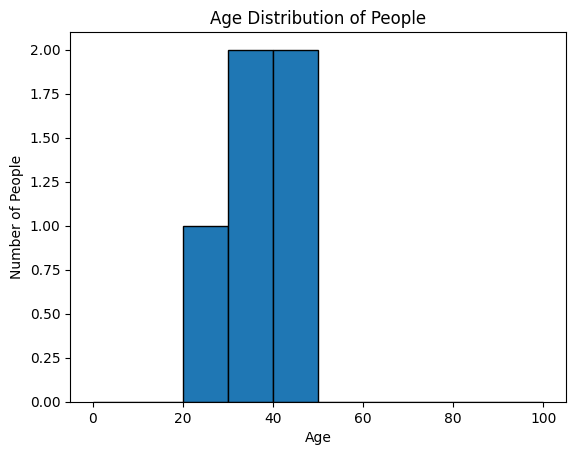

In [3]:
from neo4j import GraphDatabase
import matplotlib.pyplot as plt

# Neo4j Connection Setup
class Neo4jHandler:
    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self.driver.close()

    def get_age_distribution(self):
        with self.driver.session() as session:
            result = session.execute_read(self._query_age_distribution)
            return result

    @staticmethod
    def _query_age_distribution(tx):
        query = (
            "MATCH (p:Person) "
            "RETURN p.age AS age"
        )
        result = tx.run(query)
        return [record["age"] for record in result if record["age"] is not None]  # Ensure age is not None


# Function to plot age distribution
def plot_age_distribution(ages):
    # Check if we have valid data
    if not ages:
        print("No data found for ages.")
        return
    
    # Print data for debugging
    print(f"Retrieved ages: {ages}")
    
    # Create age bins
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    
    # Plot histogram
    plt.hist(ages, bins=bins, edgecolor='black')
    plt.title('Age Distribution of People')
    plt.xlabel('Age')
    plt.ylabel('Number of People')
    
    # Show plot
    plt.show()

# Main Application Logic
if __name__ == "__main__":
    # Setup connection to Neo4j
    neo4j_handler = Neo4jHandler(uri="bolt://neo4j:7687", user="neo4j", password="geheim")
    
    # Get age distribution data
    ages = neo4j_handler.get_age_distribution()
    
    # Plot the data
    plot_age_distribution(ages)
    
    # Clean up connection
    neo4j_handler.close()
